In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-prediction/seattle-weather.csv


(1461, 6)


<function matplotlib.pyplot.show(close=None, block=None)>

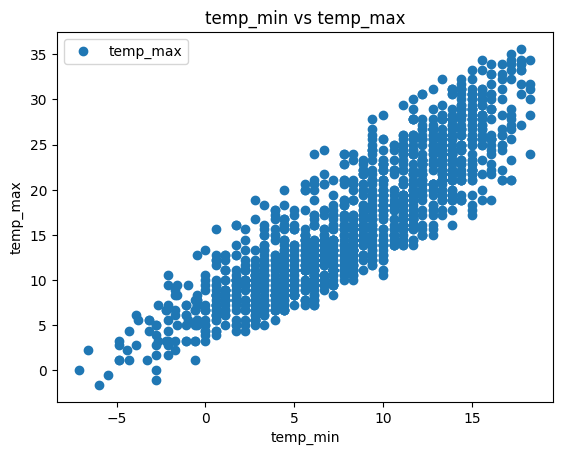

In [2]:
#trying to form a linear relationship between the max temp and min temp on a particular day.
#weather forcasting
#task is to predict max temp taking input as min temp

#import all the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#load dataset
dataset = pd.read_csv('/kaggle/input/weather-prediction/seattle-weather.csv')
print(dataset.shape)

dataset.describe()

#ploting 2D graph
dataset.plot(x='temp_min', y='temp_max', style='o')
plt.title('temp_min vs temp_max')
plt.xlabel('temp_min')
plt.ylabel('temp_max')
plt.show


pretty linear relationship between 2 variable.so clearly we can understand that here we can use linear regression.

/tmp/ipykernel_19/4165105487.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seabornInstance.distplot(dataset['temp_max'])


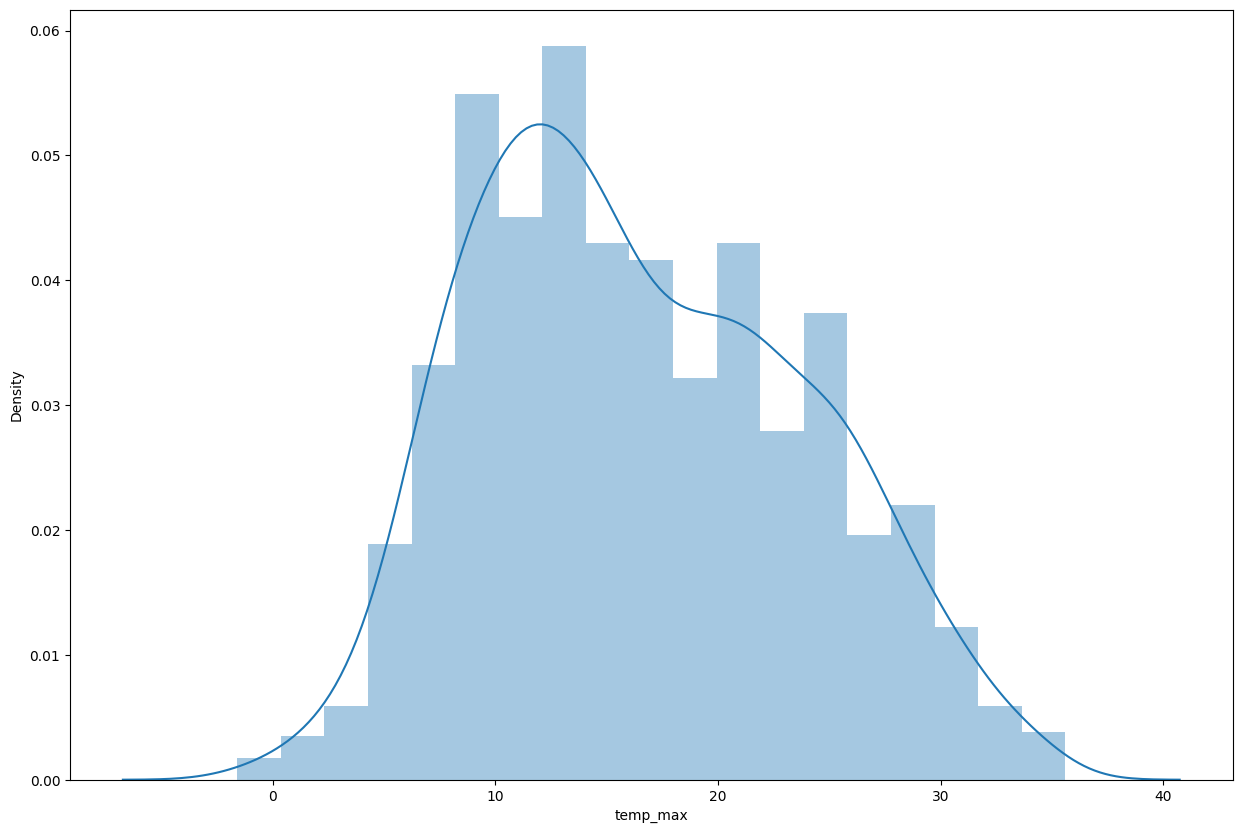

In [3]:
#check avrg max_temp
#EDA
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['temp_max'])
plt.show()


avrg max temp lies between around 10 to 20.

In [4]:
#datasplicing for training and testing data
#extractiong only 2 variable ie,temp_max and temp_min
X = dataset['temp_min'].values.reshape(-1,1)
y = dataset['temp_max'].values.reshape(-1,1)

#datasplicing to 80% as train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#building a model
regressor = LinearRegression()
regressor.fit(X_train,y_train)

#linearregression model helps to retrieve the intercept and coefficient
print('Intercept:',regressor.intercept_)
print('Coefficient:',regressor.coef_)



Intercept: [6.00577259]
Coefficient: [[1.27128412]]


what this coef value means is every 1 unit change of min temp ,change in the max temp is 1.2712

In [5]:
#now we have finished training lest do pred bu using test data
#lets see how accuratly algorithm predicts the % score
y_pred = regressor.predict(X_test)

#compairing actual with predicted
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
print(df)



     Actual  Predicted
0      20.0  21.515439
1      10.6  15.921789
2      14.4  18.718614
3      23.9  15.921789
4      12.8  15.159018
..      ...        ...
288    10.6  11.599423
289    17.2  15.159018
290    22.8  18.718614
291     6.7  10.963781
292    22.8  21.515439

[293 rows x 2 columns]


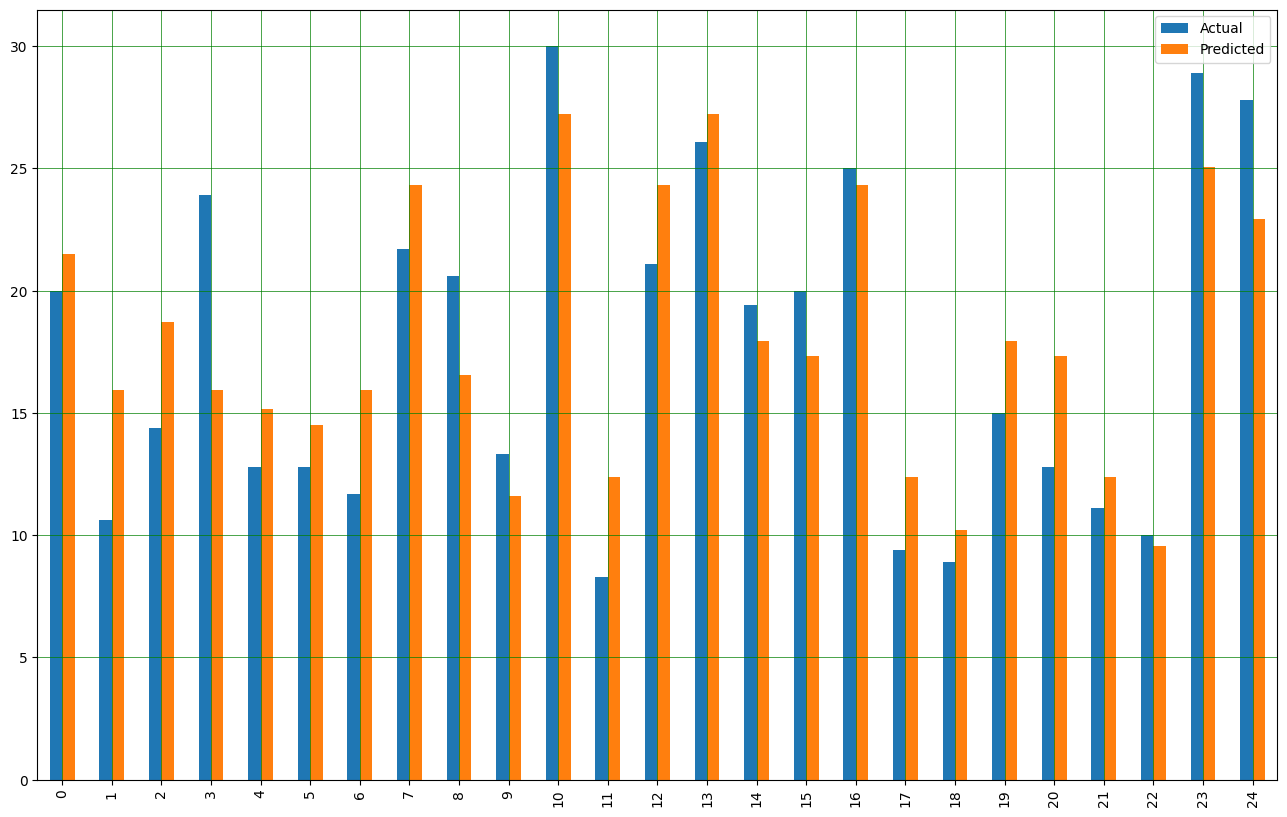

In [6]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle = '-',linewidth = '0.5',color = 'green')
plt.grid(which='minor',linestyle = '-',linewidth = '0.5',color = 'green')

In [7]:
#for regression algorithm 3 evaluation matrics are used
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mean absolute error: 2.814461486372697
mean squared error: 11.89886444956574
root mean squared error: 3.449473068392583
